<a href="https://colab.research.google.com/github/tbeucler/2023_MLEES_JB/blob/main/ML_EES/Frederick/Chapter8_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Implementing Explainable AI Methods on Simple Datasets

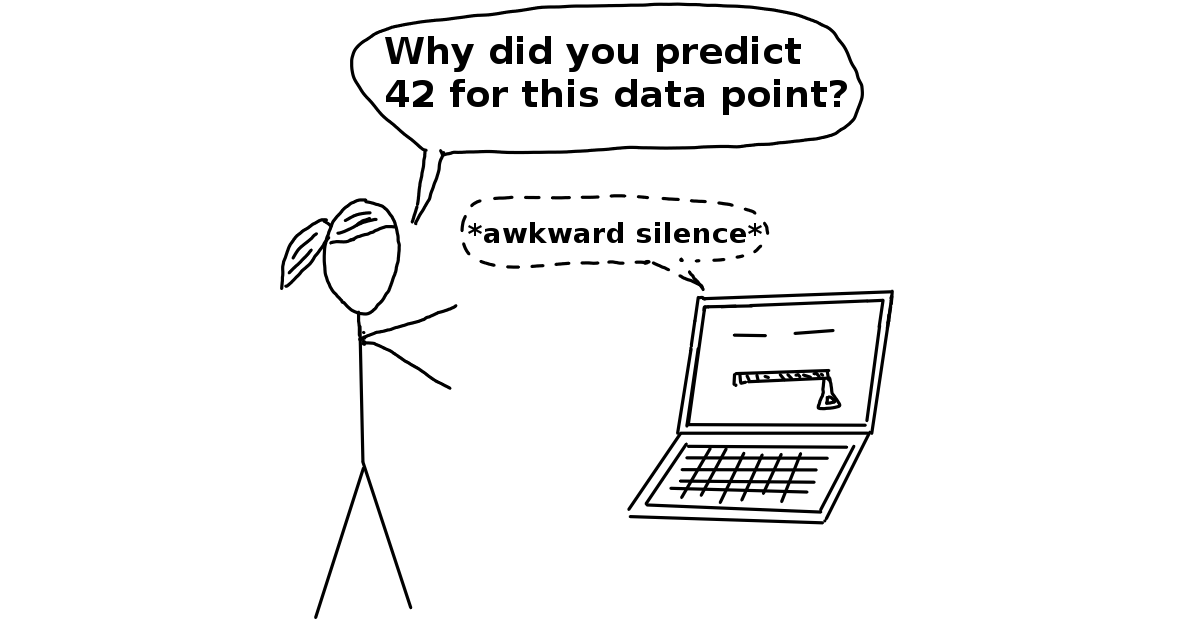

"*A Black Box Model is a system that does not reveal its internal mechanisms. In machine learning, “black box” describes models that cannot be understood by looking at their parameters (e.g. a neural network). The opposite of a black box is sometimes referred to as White Box, and is referred to in this book as interpretable model. Model-agnostic methods for interpretability treat machine learning models as black boxes, even if they are not.*"

**Can you enhance the trustworthiness of machine learning models by employing eXplainable Artificial Intelligence methods to challenge their black-box nature?**

Image/Quote source: Christopher Molnar's "[*Interpretable Machine Learning*](https://christophm.github.io/interpretable-ml-book/terminology.html)" book

For this chapter's first tutorial, our focus will be on implementing fundamental techniques that shed light on the process through which machine learning models generate predictions. The ability to elucidate the *how* behind these predictions is pivotal for enhancing the trustworthiness of the models. Moreover, this exploration may unveil opportunities for new scientific discoveries along the journey!

Upon completing this tutorial, you will gain proficiency in:

1. Implementing permutation feature importance and partial independence plots.
2. Applying these elucidation tools to linear models, tree models, and neural networks.
3. Acquiring a foundational understanding of Shapely values.
4. Mastering the utilization of the SHAP package to explicate various machine learning models.

Throughout this tutorial, we will apply eXplainable Artificial Intelligence (XAI) plots, such as Partial Dependence Plots (PDPs), on straightforward ML models trained with sample datasets. Subsequently, in the following tutorial, we will put our acquired knowledge into practice by employing XAI tools on a real-world environmental science dataset.

Author:  
Frederick Iat-Hin Tam (iathin.tam@unil.ch)  
Tom Beucler (tom.beucler@unil.ch)

In [1]:
#@title Run this cell to get the python environment set up!
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pooch

#Data Visalization Import
from google.colab import data_table


# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

! pip install shap

import pooch
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import partial_dependence
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from scipy.special import logit

ModuleNotFoundError: No module named 'sklearn'

## I) Partial Dependence Plots and Permutation Feature Importance

We will first load a simple tabular datafile containing data about the Titanic. 🛥

In [ ]:
# Path to the file
csv_path = 'https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EayyNIc4EHlLpkUwb1ZmilMBMzZ3v59Muj_HtiFQ1rLP_A?download=1'
hash = '7d118fef8b6ccf7f81111877bc388536f7b1e498a655e3d649d19aaa010e9f6f'

# Load and read the file
csv_file = pooch.retrieve(csv_path, known_hash=hash)
titanic_df = pd.read_csv(csv_file)#, index_col=0)

# Print the header
print("Here's a data sample. You can copy the row header text from here if you need it later 😉")
titanic_df.head(5)

The data table contains records of passengers onboard the Titantic cruise ship. Included in the table are the personal details of different passengers, the fare and cabin class they are in, and whether or not they managed to survive the disaster.

Based on this dataset, we will train a simple classification model to determine if a given passenger can survive the incident, based on available information on his/her age, ticket fare, etc.

This exercise is based on a Kaggle Competition Notebook series (https://www.kaggle.com/code/dansbecker/partial-dependence-plots)

### Q1: Train a simple machine learning model on the Titanic Dataset and measure its accuracy

Our problem can be phrased as a binary classification problem that requires a ML model to give binary outputs on whether a passenger can survive the disaster or not.

Remember that the code snippets below are *suggestions* and that we encourage you to be creative in how you solve this question 🎨

Hints:

1. We will use the 'PassengerID', 'Age', and 'Fare' columns in the `titanic_df` Pandas DataFrame to predict the 'Survived' column.
2. We will need to standardize our input data before training our models. We recommend using the `SimpleImputer` module from `sklearn.impute` for this task. ([Reference link](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html))
3. Use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the standardized inputs and outputs into training set, validation set, and test set.
4. Use either [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) or [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to train accurate binary classifiers. You may use a baseline [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
# Assuming titanic_df is a DataFrame containing Titanic dataset with columns like 'Survived', 'PassengerId', 'Age', 'Fare', etc.

# Extracting the 'Survived' column as the target variable (y)
y = titanic_df[___]

# Defining a list of features to be used as input variables (X_cols)
X_cols = [___, ___, ___,]

# Creating a new DataFrame (X) containing only the selected input columns
X = titanic_df[___]

In [ ]:
# Create a SimpleImputer instance (standardizer) for handling missing values
standardizer = SimpleImputer()

# Use the fit_transform method to replace missing values in the input features (X) with the mean (default strategy) of each column
standardized_X = standardizer.___(X)

In [ ]:
# Split the standardized features (standardized_X) and target variable (y) into training and combined validation-test sets
X_train, X_validtest, y_train, y_validtest = ___(___, ___, test_size=___, random_state=rnd_seed)

# Further split the combined validation-test sets into separate validation and test sets
X_valid, X_test, y_valid, y_test = ___(___, ___, test_size=___, random_state=rnd_seed)

In [ ]:
# Create an instance of the machine learning model used for binary classification
ML_model = ___()

In [ ]:
# Train the machine learning model (ML_model) using the training data (X_train, y_train)
ML_model.___(pd.DataFrame(data=___, columns=___), y_train)

In [ ]:
# Use the trained ML_model to make predictions on the validation data (X_valid)
# and calculate the accuracy by comparing the predicted labels with the actual labels (y_valid)
accuracy = ___(___, ML_model.predict(___))

In [ ]:
accuracy

The accuracy score for the classifier may not be terribly good (we got 0.66 with a `GradientBoostingClassifier`).

We encourage you to test different ways to tune the model hyperparameters to get a better classification performance than the model we just created, for instance using [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 🤖



In [ ]:
#@title BONUS: Tune your machine learning model (time-consuming)

# Using GradientBoostingClassifier as an example

# Define the hyperparameter grid to search
# If it takes too long, keep it to no more than three parameters to explore
param_grid = {
    'n_estimators': [175, 200, 225],  # Number of boosting stages to be run
    'learning_rate': [0.0075, 0.01, 0.0125],  # Step size shrinkage used to prevent overfitting
    'max_depth': [1, 2, 3],  # Maximum depth of the individual trees
}

# Create an instance of the GradientBoostingClassifier
base_model = GradientBoostingClassifier()

# Instantiate GridSearchCV with the model, hyperparameter grid, and scoring metric (e.g., accuracy)
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Perform the grid search on the training data
grid_search.fit(pd.DataFrame(data=X_train, columns=X_cols), y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
best_model_accuracy = accuracy_score(y_valid, best_model.predict(pd.DataFrame(data=X_valid, columns=X_cols)))
print("Accuracy of the Best Model on Validation Set:", best_model_accuracy)

if best_model_accuracy>accuracy: ML_model = best_model

The first tool of ML explainability is Partial Dependence Plot (PDPs). Simply put, **partial dependence plots summarizes all possible ML model outputs when only one feature in the input is perturbed.**

The PDP function for regression tasks can be defined as (Molnar Ch. 8.1):

$\hat{f}_S(x_S) = \mathbb{E}_{X_C} \left[ f(x_S, X_C) \right]
= \int \hat{f}(x_S, X_C) \, dP(X_C)$

where $x_{S}$ is the input feature we would like to perturb, $X_{C}$ include the reminding features in the input dataset, and $\hat{f}()$ representing the trained machine learning model.

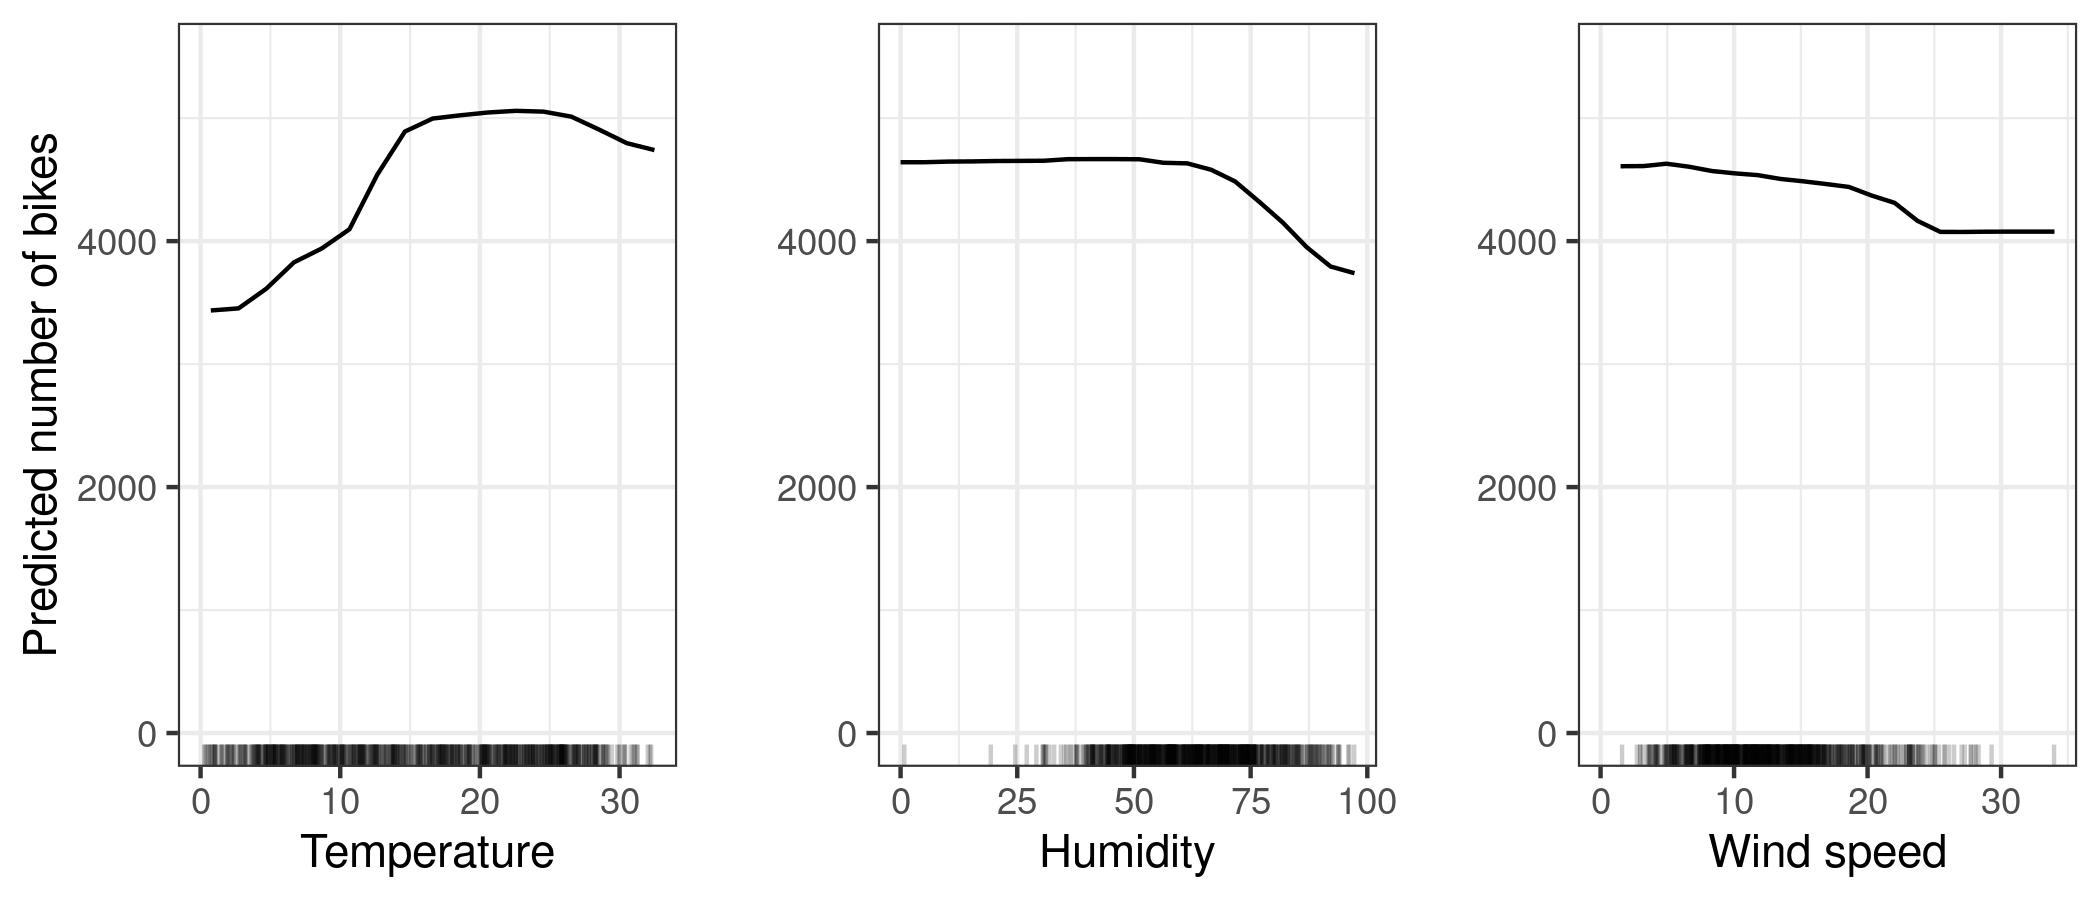

*From Molnar's [interpretable ML book](https://christophm.github.io/interpretable-ml-book/pdp.html): PDPs for the bicycle count prediction model and temperature, humidity and wind speed. The largest differences can be seen in the temperature. The hotter, the more bikes are rented. This trend goes up to 20 degrees Celsius, then flattens and drops slightly at 30. Marks on the x-axis indicate the data distribution.*

Luckily, there are existing packages to calculate PDPs so we do not need to start from scratch!

In the second question, we ask you to produce a simple PDP to show how the three features in the Titanic Dataset affects the ML model predictions.

### Q2: Produce a Partial Dependence Plot with the trained classification model

Complete the `get_pdp_values_shap` function, get the `PassengerId`, `Age` and `Fare` PDPs, and plot them in a 1x3 matplotlib panel plot.

Hints:

(1) The SHAP package have a nice function `shap.partial_dependence_plot` to calculate PDPs. However, it does not work well with matplotlib subplots. \\
(2) Here, we ask you to complete a function to get data from the PDP plots. \\
(3) The function should return six arrays as outputs. These arrays correspond to the x-coordinates and y-coordinates of the PDP curve, as well as the coordinates of the median values of the data and the coordinates of the prediction based on the median data.

In [ ]:
def get_pdp_values_shap(model=None, X=None, col_name=None):
    # Generate partial dependence plots using SHAP library
    fig, ax = shap.___(
        col_name,
        model.predict,
        X,
        ice=False,
        model_expected_value=True,
        feature_expected_value=True,
        show=False
    )

    # Extract x and y coordinates from the generated plots
    PDP_x, PDP_y = ax.lines[0].___(), ax.lines[0].___()
    E_x, E_y = ax.lines[1].___(), ax.lines[1].___()
    Ef_x, Ef_y = ax.lines[2].___(), ax.lines[2].___()

    # Close the figure to avoid displaying the plot
    plt.close(fig)

    # Return the extracted coordinates
    return PDP_x, PDP_y, E_x, E_y, Ef_x, Ef_y

In [ ]:
# Get PDP values for 'PassengerId' feature
PDP_x_PID, PDP_y_PID, E_x_PID, E_y_PID, Ef_x_PID, Ef_y_PID = get_pdp_values_shap(___, ___, 'PassengerId')

# Get PDP values for 'Age' feature
PDP_x_age, PDP_y_age, E_x_age, E_y_age, Ef_x_age, Ef_y_age = get_pdp_values_shap(___, ___, 'Age')

# Get PDP values for 'Fare' feature
PDP_x_fare, PDP_y_fare, E_x_fare, E_y_fare, Ef_x_fare, Ef_y_fare = get_pdp_values_shap(___, ___, 'Fare')

In [ ]:
# Create a 1x3 subplot layout with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 4), sharey=True)

# Plot for 'PassengerId'
axes[0].plot(___, ___, lw=2.05)
axes[0].axvline(___, lw=0.5, c='k', ls='--')  # Vertical line at the expected value of 'PassengerId'
axes[0].axhline(___, lw=0.5, c='k', ls='--')  # Horizontal line at the expected value of the model prediction

# Plot for 'Age'
axes[1].plot(___, ___, lw=2.05)
axes[1].axvline(___, lw=0.5, c='k', ls='--')  # Vertical line at the expected value of 'Age'
axes[1].axhline(___, lw=0.5, c='k', ls='--')  # Horizontal line at the expected value of the model prediction

# Plot for 'Fare'
axes[2].plot(___, ___, lw=2.05)
axes[2].axvline(___, lw=0.5, c='k', ls='--')  # Vertical line at the expected value of 'Fare'
axes[2].axhline(___, lw=0.5, c='k', ls='--')  # Horizontal line at the expected value of the model prediction

# Add grids to the subplots
axes[0].grid(alpha=0.2, lw=1, color='gray')
axes[1].grid(alpha=0.2, lw=1, color='gray')
axes[2].grid(alpha=0.2, lw=1, color='gray')

# Set a common title for the subplots
plt.suptitle('Partial Dependence Plots')

# Set x-axis labels
axes[0].set_xlabel('PassengerID')
axes[1].set_xlabel('Age')
axes[2].set_xlabel('Fare')

# Set y-axis labels
axes[0].set_ylabel('E[f(X)]')
axes[1].set_ylabel('E[f(X)]')
axes[2].set_ylabel('E[f(X)]')

# Customize plot appearance for the first subplot
for ax in axes:
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(labelsize=11)

# Display the plots
plt.show()

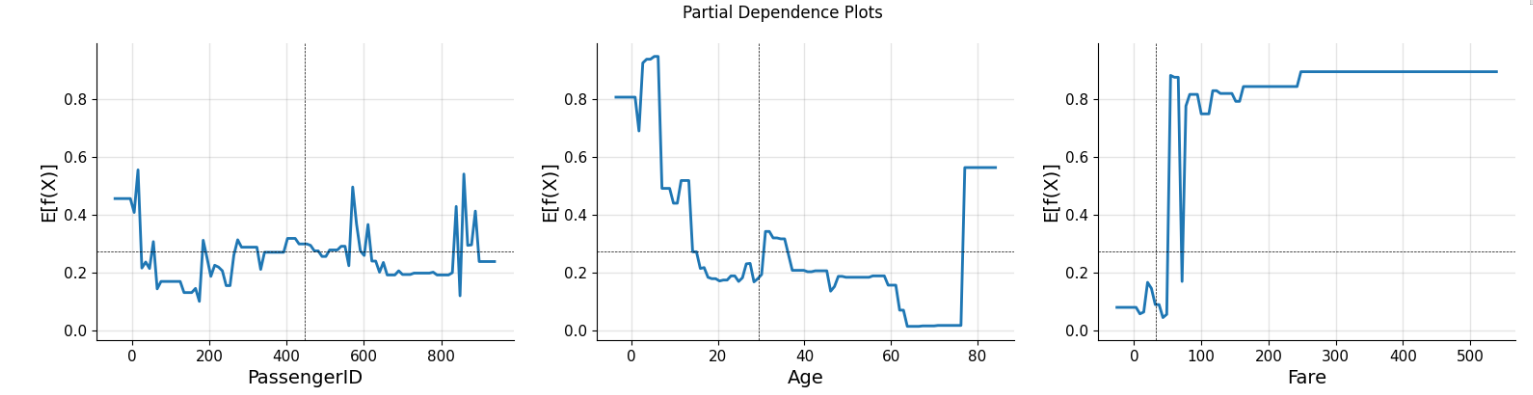

For reference, above are the partial dependence plots we got when using a Gradient Boosting Classifier.

*What can you conclude from the three PDPs that you just created?*

*What variable has a positive impact on the survival chance of a particular passenger? What variable has little to no impact?*

Permutation Feature Importance is another type of model-agnostic method that can be used to explain different machine learning models.

Both PDPs and Permutation Feature Importance involves summarizing all model predictions when we perturb the input feature, with the goal of isolating the effect of the perturbed feature on the predictions.

The interested feature in the permutation importance is perturbed differently to that used to create PDPs. **Permutation Feature Importance is defined as the deterioration in model performance when the interested feature in shuffled randomly.**

### Q3: Calculate the mean permutation feature importance for all three input features

Hint:

1. We will import the `permutation_importance` module from `sklearn.inspection`. ([Reference link](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html))

2. We repeat the calculation 30 times to make sure the values we get are valid. This is determined with the `n_repeats` parameter in the `permutation_importance` function.

3. The mean and standard deviation of the permutation importance values can be accessed from a permutation_importance object with two attributes: `.importances_mean` and `.importances_std`.

In [ ]:
# Calculate permutation importances using the permutation_importance function
r = permutation_importance(___, ___, ___, n_repeats=___, random_state=rnd_seed)

In [ ]:
# Iterate through features, sort them by importance, and print the results
for i in r.importances_mean.argsort()[::-1]:
    # Check if the importance is significantly different from zero
    if r.importances_mean[i] - 2 * r.importances_std[i] > ___:
        # Print feature name, mean importance, and standard deviation
        print(
            f"{X_cols[i]:<8}"  # Feature name, left-aligned with width 8
            f"{r.importances_mean[i]:.3f}"  # Mean importance value, formatted to 3 decimal places
            f" +/- {r.importances_std[i]:.3f}"  # Standard deviation of importance, formatted to 3 decimal places
        )

## II) Introduction to SHAP

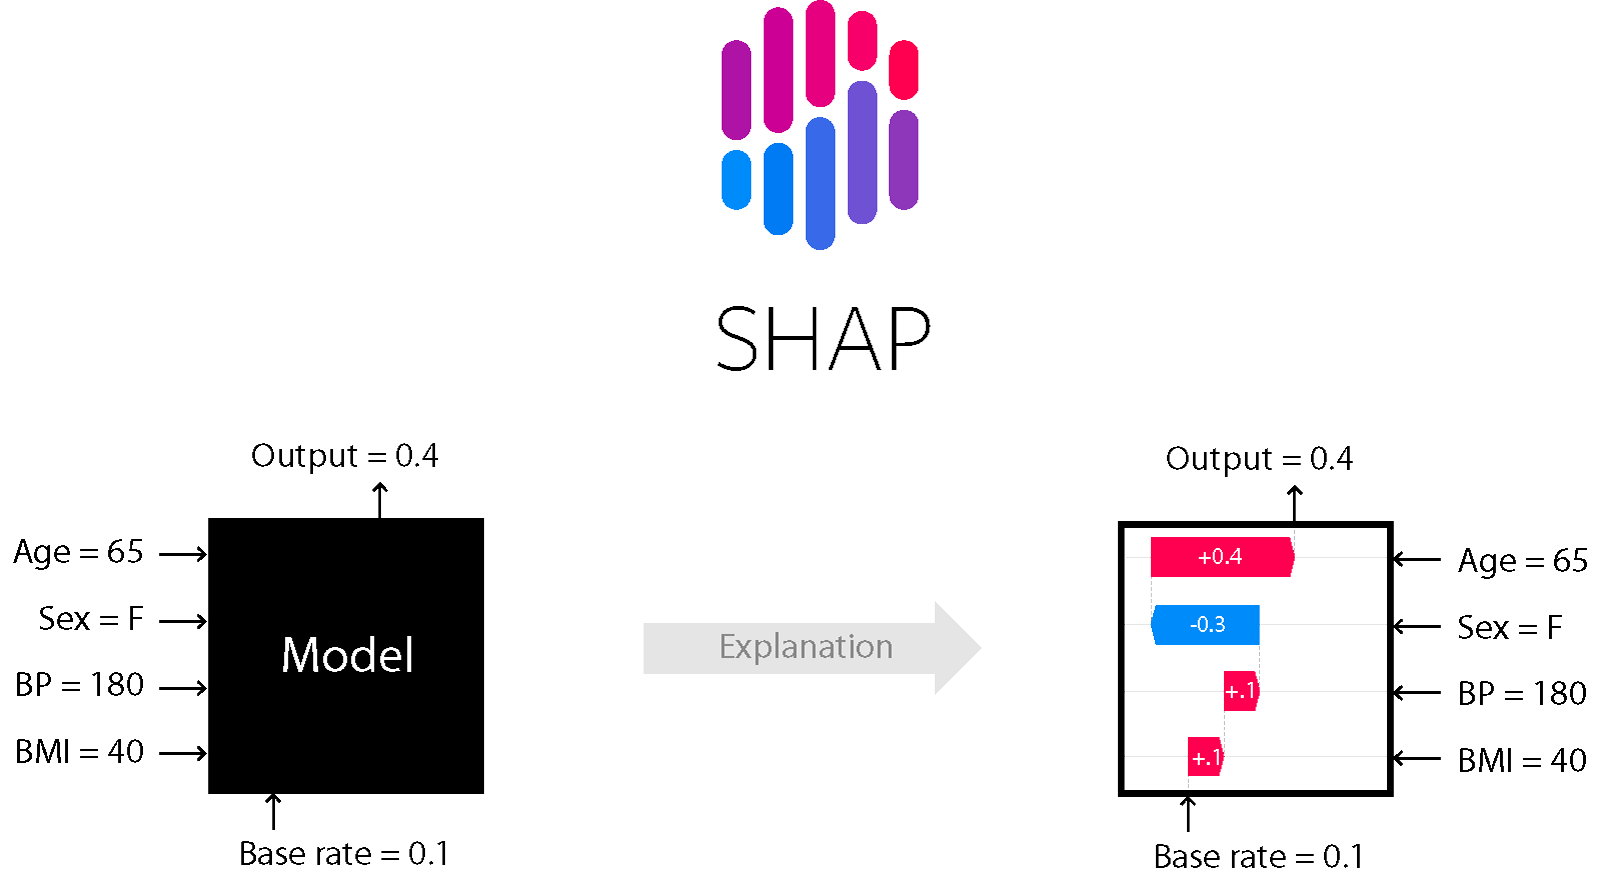

In this section, we will introduce another popular library for ML Explainability: SHAP. The usefulness of the SHAP package relies on using it to calculate and analyze Shapely values.

Shapely value is a useful concept from comparatively game theory that is applied to machine learning context. In order to link machine learning models and game theory, we need to treat the prediction task for each instance of the dataset as a game. The Shapely value for an individual input feature - anologous to players in the game - quantifies the average affect of adding that feature to the model has on the game outcome, i.e., the difference between a prediction on a sample made with the interested input and one without.

For a simple multiple linear regression model,

$\hat{f} = \beta_0+\beta_1 x_1+\beta_2 x_2 + ... + \beta_i x_i$

the contribution $\phi_j$ for the j-th feature in the input to the game outcome is:

$\phi_j (\hat{f}) = \beta_j x_j - \beta_j E(X_j)$

where $\beta_j E(X_j)$ is the mean effect estimate of the feature, i.e., the prediction when the feature value is not known. For a linear model, we can directly read the shapely value from the PDPs.



In [ ]:
# Generate a classic housing price dataset for California
# X: Features, y: Target variable (housing prices)
X, y = shap.datasets.california(n_points=1000)

# Sample 100 instances from the dataset for use as the background distribution
X100 = shap.utils.sample(X, 100)

# Create a simple linear regression model
model = sklearn.linear_model.LinearRegression()

# Fit the linear regression model to the housing price dataset
model.fit(X, y)

In [ ]:
# Compute SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# Make a standard partial dependence plot
sample_ind = 50

# Create a partial dependence plot for the 'MedInc' feature
shap.partial_dependence_plot(
    "MedInc",  # Feature for which the partial dependence plot is generated
    model.predict,  # Model's prediction function
    X100,  # Background dataset
    model_expected_value=True,  # Display model expected value on the plot
    feature_expected_value=True,  # Display feature expected value on the plot
    ice=False,  # Disable individual conditional expectation (ICE) curves
    shap_values=shap_values[sample_ind : sample_ind + 1, :],  # SHAP values for a specific instance
)

In the SHAP package, the shapely value for sample 50 in the dataset is simply the difference between the values for that sample in the PDP and the ML prediction made with the median values of the `MedInc` feature.

One of the more attractive properties of shapely value is its additive properties.

If we sum the effect of all the features in a linear model, the result for a particular sample is simply its prediction values minus the mean prediction over the entire dataset.

$\sum_{j=1}^p \phi_j (\hat{f}) = \hat{f}(x) - E(\hat{f}(X))$


We can use a waterfall plot to summarize all the contributions $\phi_j$ from different input features.

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

The above plot summarizes how each input feature in the housing dataset impact the prediction for the fiftieth sample in the dataset. From the above plot, we also see that only a subsample of the input features yield non-negligible effect on the ML prediction.

### Q4: Train an XGBoost Classifier to predict wine quality

Now let us try to put what we have learned in practice and create some of these beautiful SHAP plots!

First, we will train a tree-based XGBoost classifier to predict wine quality from different wine properties.

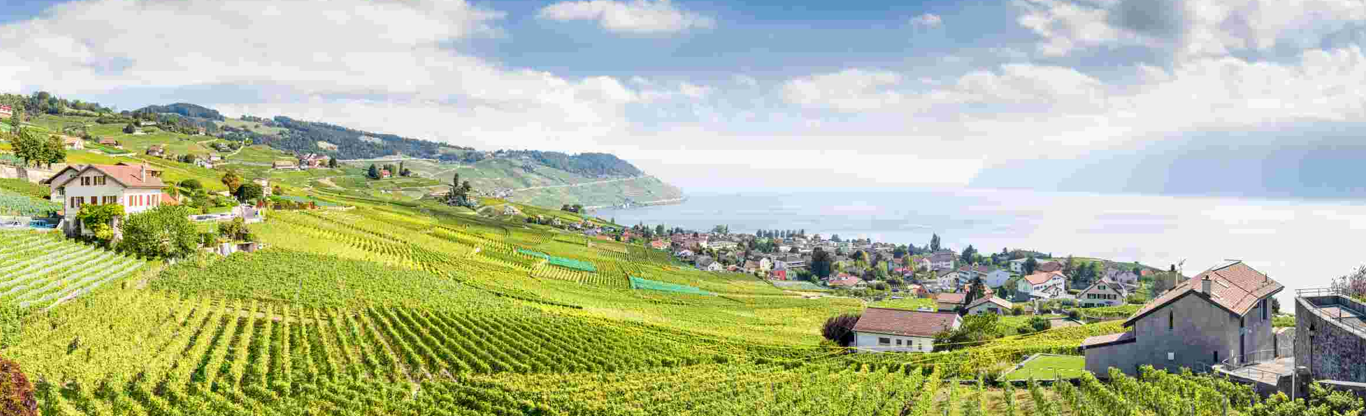

*Can you predict the quality of a wine based on its chemical properties?*

[Image source: eyetronic](https://stock.adobe.com/contributor/202377437/eyetronic?load_type=author&prev_url=detail)

In [ ]:

# URL of the CSV file
csv_path2 = 'https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Eax0zdkmltFCu_zgaA4Bo2YBimi3g3Qw2HLwPVXurnLosQ?download=1'

# Known hash of the file to ensure integrity
hash2 = 'd6a0d9bd24806944818795f22500c46cb6424cbff517aacda36595d3ed9b2daa'

# Retrieve the CSV file using pooch
csv_file2 = pooch.retrieve(csv_path2, known_hash=hash2)

In [ ]:
# Read the CSV file into a DataFrame
wine_df = pd.read_csv(csv_file2)  # You can uncomment `, index_col=0` if you want to set the first column as the index

# Display the first 5 rows of the DataFrame
print("Here's a data sample. You can copy the row header text from here if you need it later 😉")
wine_df.head(5)

You will notice that the `Quality` column contains various integer values. To simplify our problem and convert it into a straightforward binary classification task, we'll transform this column as follows:

- If $\left( \text{Quality} < 5 \right)$, we'll label it as 0, indicating "bad wine."
- If $\left( \text{Quality} \geq 5 \right)$, we'll still label it as 0, signifying "bad wine."

This transformation creates a binary classification problem, where the goal is to classify wines as either "bad" or "not bad" based on the quality scores.

#### Q4a: Data Processing

We recommend following the steps below:

(1) Extract `quality` column as the output (y) dataset. In the mean time, remove the `quality` column from the input (X) dataset.

(2) Convert the `quality` column into 0 and 1 with the above criteria.

(3) Use `train_test_split` to split the data into training and test set. We will use a 70%-30% split here.

In [ ]:
# Copying the original DataFrame to a new variable for manipulation
wines = wine_df.copy()

# Extracting the target variable and creating a list of dependent variables
target = ___  # Name of the column representing the target variable
features_list = list(wines.columns)  # List of all column names in the DataFrame
features_list.remove(target)  # Removing the target variable from the list of features

In [ ]:
# Create a separate target vector by removing the target column from the DataFrame
y = wines.___(___)

# Map the target to a binary class where quality <= 5 is 0 (bad wine) and quality > 5 is 1 (good wine)
y = y.apply(lambda x: ___ if ___ else ___)

# Quickly check the balance of the target variable partition
y.sum() / len(y)

In [ ]:
# Splitting the dataset into training and testing sets with a 70/30 ratio
# X_train: Features for training, X_test: Features for testing
# y_train: Target for training, y_test: Target for testing
X_train, X_test, y_train, y_test = ___(___, ___, test_size=___, random_state=42)

# Displaying the shapes of the training and testing feature sets
X_train.shape, X_test.shape

#### Q4b: Initiatize and train an XGBClassifier

Hints:

(1) Refer the XGBClassifier tutorial [link](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) if you want to learn more about training a XGBoost model.

(2) We will set the XGBClassifier objective as `binary:logistic`.

(3) Evaluate model performance with the test set. Report two performance scores: Accuracy score and f1_score.

Reference for these performance scores:

(a) [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

(b) [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [ ]:
# ML in two lines ;)
xgb = ___(objective=___, random_state=33, n_jobs=-1)
%time xgb.___(___, ___)

In [ ]:
# Calculate and display the accuracy score of the trained XGBoost classifier on the test data
metrics.___(___, xgb.___(___))

In [ ]:
# Calculate and display the F1 score of the trained XGBoost classifier on the test data
# y_test: True labels for the test set, xgb.predict(X_test): Predicted labels by the XGBoost model
metrics.___(___, xgb.___(___))

### Q5: Train a TreeExplainer on the XGBoost Classifier and calculate the SHAP values for the X_test dataset

(1) Train a TreeExplainer ([Reference](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.TreeExplainer.html)) on the trained XGBoost Classifier model.

(2) Apply the Explainer to the test dataset, and save the calculated SHAP values.

In [ ]:
# Explain the model's predictions using SHAP values
# (This syntax works for XGBoost, LightGBM, CatBoost, and scikit-learn models)

# Create a SHAP TreeExplainer for the XGBoost model
wineexplainer = shap.___(___)

# Calculate SHAP values for the test set
wineshap_values = wineexplainer(___)

### Q6: Produce two different plots to summarize the mean absolute SHAP values for *all* input features

For this problem, we will try to create some plots that explain the entire dataset, i.e., global explanation methods.

In the previous exercise, we introduced PDPs and Permutation Importance, which are global methods. Several more advanced plots are available in the SHAP package to above us to summarize more information in pretty plots!

We recommend experimenting with bar plots and beeswarm plots. You can refer to the following tutorial if you have doubts.

[Bar plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html)

[Beewsarm plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html)



In [ ]:
# Create and display a bar plot of feature importance using SHAP values
shap.plots.___(___)

In [ ]:
# Create and display a beeswarm plot to visualize the distribution of SHAP values for each feature
shap.plots.___(___)

### Q7: Use two different types of plots - waterfall plots and force plots - to explain how the prediction for the second sample is made

Now, we turn our focus to more detailed, sample-based explainations. We briefly introduced the waterfall plots in the tutorial. We will now try to create such plots and one more type of plots - the force plots - to explain the contributions of different inputs to the prediction.

As an example, we will try to explain the prediction for the second sample.

Reference for the two plots:

[Waterfall plots](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html)

[Force Plots](https://shap.readthedocs.io/en/latest/generated/shap.plots.force.html#shap.plots.force)

Hint: The Force plots require the javascripts library to be displayed. We need to use the following code: `shap.initjs()` to initialize javescript in colab.

In [ ]:
# Create and display a waterfall plot to visualize the impact of each feature on a specific prediction
# wineshap_values[index]: SHAP values for a specific prediction (instance) located in index
# max_display: Limit the number of features displayed to 14 for clarity
shap.plots.___(wineshap_values[___], max_display=___)

In [ ]:
# Initialize the JavaScript visualization for SHAP values
shap.initjs()

# Create and display a force plot to illustrate the global interpretation of a specific prediction
# wineshap_values[index]: SHAP values for a specific prediction (instance corresponding to index)
shap.plots.___(wineshap_values[___])

### Q8: What do the numbers in the force plots represent?

In the force plot and waterfall plot we've just examined, we gained insights into how various factors collaborate to steer the model's prediction. For the second element (index 1), we go from an average expectation of 0.103 to a final output of -4.37.

Now, considering our model is designed as a binary classifier, exclusively capable of yielding outputs of 0 or 1, it prompts a natural question:

*Why does SHAP provide explanations for an output like -4.37 for the test set's second element?*

Let's delve into this apparent paradox to enhance our understanding 🕵

(1) Utilize the `.predict_proba()` method for the test set's element you investigated above

(2) Implement the Logistic function ([Reference link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logit.html)) to transform one of the values obtained in Step (1).

What do you see?

In [ ]:
# Predicted probability for the first instance in the test set using XGBoost's predict_proba
# Followed by ???.iloc[index]: True label for the first instance in the test set
xgb.___(___)[___] , ___.iloc[___]

In [ ]:
# Applying the Logistic function to the appropriate value obtained in the first step
logit(___)

## III) SHAP DeepExplainer for Neural Networks

In this last part, our goal is to train a CNN on the MNIST dataset, and apply SHAP's DeepExplainer on the trained model to understand the pixels it uses to make accurate predictions 🔢

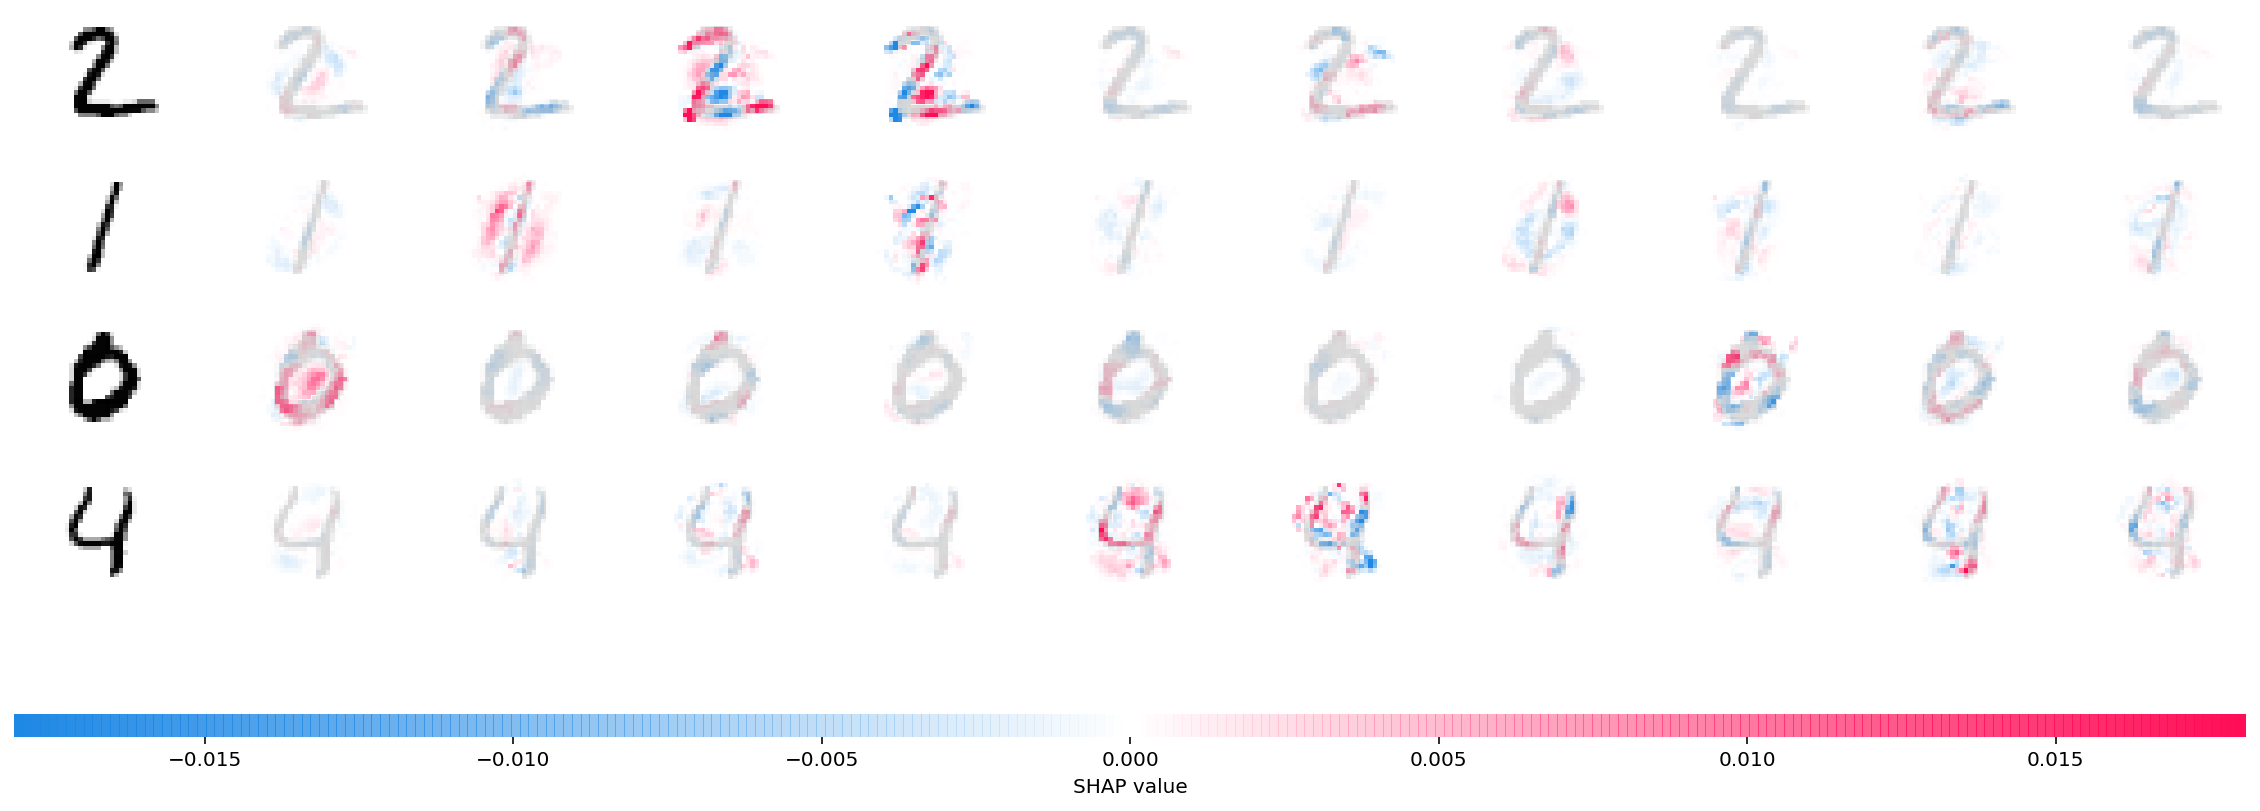

*Which part of the image does SHAP use to accurately classify digit pictures?*
[Source](https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Front%20Page%20DeepExplainer%20MNIST%20Example.html)

### Q9: Design a CNN model on the MNIST dataset

In [ ]:
# Set the parameters for training
batch_size = ___  # Number of samples in each training batch (Recommended: 128)
num_epochs = ___    # Number of times the entire dataset is used for training (Recommended: At least 2)
device = torch.device("cpu")  # Use the CPU for training (can be switched to GPU if available)

In [ ]:
# Create DataLoader objects for the training and testing datasets
# MNIST dataset is used with transformations to convert images to tensors
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "mnist_data",  # Directory to store the dataset
        train=True,     # Use the training set
        download=True,  # Download the dataset if not available
        transform=transforms.Compose([transforms.ToTensor()]),  # Convert images to tensors
    ),
    batch_size=batch_size,  # Set the batch size for training
    shuffle=True,           # Shuffle the training data for randomness
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "mnist_data",  # Directory to store the dataset
        train=False,    # Use the testing set
        transform=transforms.Compose([transforms.ToTensor()]),  # Convert images to tensors
    ),
    batch_size=batch_size,  # Set the batch size for testing
    shuffle=True,           # Shuffle the testing data for randomness
)



Here, your task is to design a CNN model named `Net()` on the MNIST dataset.

There is flexibility in how the model architecture should be like. You can directly apply some CNN architectures on MNIST that we played with in previous exercise or some architectures available online here.

The only instruction here is that the model should end with a linear layer that output 10 values that are converted into probability after passing through a `Softmax` layer for multi-class classification.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Define convolutional layers (you can be creative!)
        self.conv_layers = nn.Sequential(
            ___
        )

        # Define fully connected layers (you can be creative!)
        self.fc_layers = nn.Sequential(
            ___
        )

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.conv_layers(x)

        # Reshape for fully connected layers
        x = x.view(-1, 320)

        # Forward pass through fully connected layers
        x = self.fc_layers(x)

        return x

We have already prepared some ready made functions to train the model and report the performance skill of the trained model on the test set.

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()

    # Iterate through batches in the training data
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Compute the negative log likelihood loss
        loss = F.nll_loss(output.log(), target)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print training progress
        if batch_idx % 100 == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )

def test(model, device, test_loader):
    # Set the model to evaluation mode
    model.eval()

    test_loss = 0
    correct = 0

    # Disable gradient computation during evaluation
    with torch.no_grad():
        # Iterate through batches in the test data
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            # Forward pass
            output = model(data)

            # Compute the negative log likelihood loss and accumulate the total loss
            test_loss += F.nll_loss(output.log(), target).item()

            # Get the predicted class labels
            pred = output.max(1, keepdim=True)[1]

            # Count the number of correct predictions
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Compute the average test loss
    test_loss /= len(test_loader.dataset)

    # Print test set results
    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

### Q10: Train the CNN model

(1) Use the train() function to train your CNN model.

(2) You can experiment with the optimizer to get better skills. Especially the learning rate `lr=`, and if you are using SGD, the momentum `momentum=`.

(3) Make sure the model is accurate enough to have learned reliable strategies to classify digits.

In [ ]:
# Instantiate the neural network model and move it to the specified device
model = Net().to(device)

# Define the optimizer with e.g., stochastic gradient descent (SGD)
optimizer = optim.___(model.parameters(), lr=___, momentum=___)

# Iterate through epochs
for epoch in range(1, num_epochs + 1):
    # Train the model on the training dataset
    train(___, ___, ___, ___, ___)

    # Evaluate the model on the test dataset
    test(___, ___, ___)

### Q11: Train a DeepExplainer on your CNN model

(1) Train a [SHAP DeepExplainer](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html) with the trained CNN model. We will use the first 100 images in the test set as the training data.

(2) Use the DeepExplainer to explain the predictions for the test images with the following index: 100, 101, 102.

(3) Use [Image plots](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.image_plot.html?highlight=image%20plot) to visualize the explanation.

In [ ]:
# Assuming 'test_loader' is a DataLoader for the test dataset

# Obtain a batch of test data (random sample due to shuffle=True)
batch = next(iter(test_loader))
images, _ = batch # No need to change this part

# Extract background ("Neutral") data and a few test images for interpretation
background = images[___:___]
test_images = images[___:___]

# Initialize a DeepExplainer using the SHAP library and the pre-trained 'model'
e = shap.___(___, ___)

# Compute SHAP values for the test images
shap_values = e.___(___)

In [ ]:
# Convert SHAP values to numpy format for visualization
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]

# Convert test images to numpy format for visualization
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

In [ ]:
# Plot the feature attributions using SHAP's image_plot function
shap.___(shap_numpy, -test_numpy)

Below are examples of attribution maps we obtained for 0 and 1 classifications.

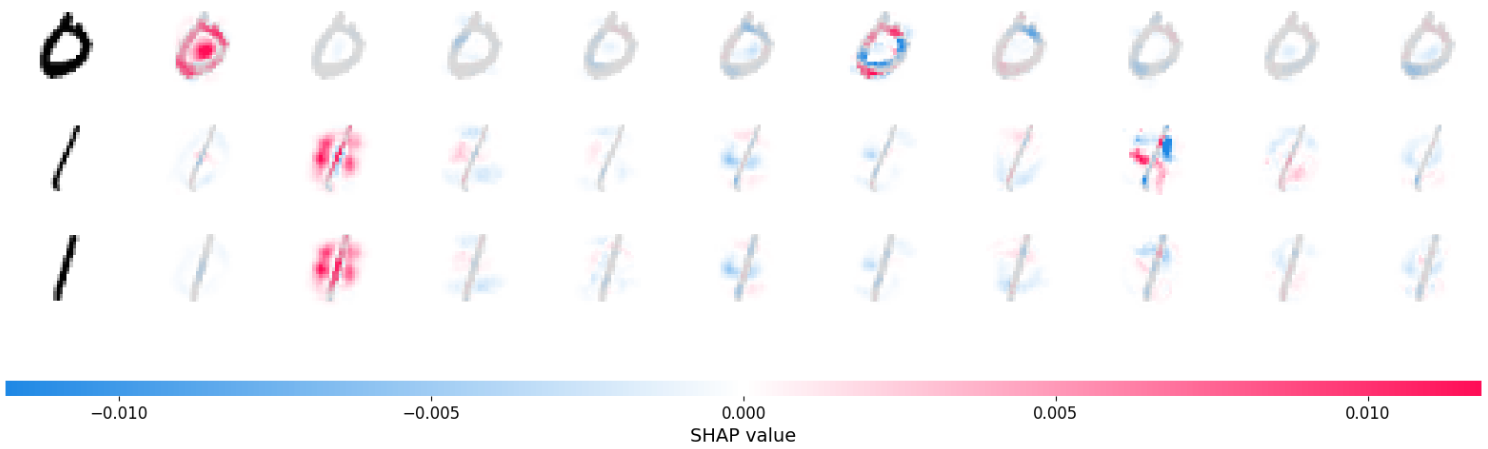